## Загрузка данных и первичный осмотр

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv("S02-hw-dataset.csv")


Первые строки датасета:

In [69]:
data.head()

,user_id,age,country,purchases,revenue
0,1,25,FR,7,749
1,2,24,RU,5,1115
2,3,52,FR,7,399
3,4,31,RU,6,654
4,5,,DE,6,1296


Информация о столбцах и типах

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    41 non-null     int64 
 1   age        40 non-null     object
 2   country    41 non-null     object
 3   purchases  41 non-null     int64 
 4   revenue    41 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.7+ KB


Базовые описательные статистики

In [71]:
data.describe()

,user_id,purchases,revenue
count,41.000000,41.000000,41.000000
mean,20.243902,4.829268,820.048780
std,11.659289,2.710189,613.127269
min,1.000000,-1.000000,0.000000
25%,10.000000,3.000000,432.000000
50%,20.000000,5.000000,693.000000
75%,30.000000,7.000000,1115.000000
max,40.000000,11.000000,2475.000000


## Пропуски, дубликаты и базовый контроль качества

Доля пропусков в каждом столбце (в исходных данных один из пропусков специально заменен на пробел):

In [85]:
data.replace(' ', None, regex=True).isna().sum()



user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

Дублирующиеся строки

In [86]:
data.duplicated()[data.duplicated()==True]

40    True
dtype: bool

Подозрительные случаи

In [87]:
data.loc[(data["age"]<0) | (data['age']>100)]

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
data.loc[(data["purchases"]<0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [ ]:
data.loc[(data['purchases']>0) & (data['revenue']==0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [ ]:
data['r/p']= data['revenue']/data['purchases']
data['r/p'].mean()

np.float64(141.94736842105263)

- Макимальные отклонения от среднего по отнонению доход/количество для корректных значений

In [ ]:
max(data[(data['revenue']>0)&(data['purchases']>0)]['r/p'])-data[(data['revenue']>0)&(data['purchases']>0)]['r/p'].mean()


np.float64(126.36111111111111)

In [ ]:
min(data[(data['revenue']>0)&(data['purchases']>0)]['r/p'])-data[(data['revenue']>0)&(data['purchases']>0)]['r/p'].mean()

np.float64(-114.63888888888889)

1. В данных имеются пропуски.
2. В данных имеются дубликаты.
3. В данных имеются нереалистичные значения.
4. Отношение доход к количеству разное. Должно ли оно быть одинаковым?
     - Если да, то имеются большие отклонения от среднего.


Уберу некорректные строки (на будущее)

In [ ]:
data = data[(data['revenue']>0)&(data['purchases']>0)&(data["age"]>0) & (data['age']<100)]

##  Базовый EDA: группировки, агрегаты и частоты

Количество строк со значением страны 'RU'

In [ ]:
data['country'].value_counts(normalize=0)['RU']

np.int64(11)

Cреднее значение для строк c корректными значениями со значением страны 

In [ ]:
(mean_data:=data.groupby(['country']).mean())

,user_id,age,purchases,revenue,r/p
country,,,,,
CN,10.000000,24.000000,4.500000,1054.000000,232.000000
DE,28.600000,34.600000,6.600000,1475.400000,225.200000
FR,20.800000,40.700000,5.200000,732.600000,143.300000
RU,19.090909,29.181818,5.636364,933.727273,168.545455
US,25.833333,38.833333,4.000000,638.166667,169.333333


## Визуализация данных в Matplotlib

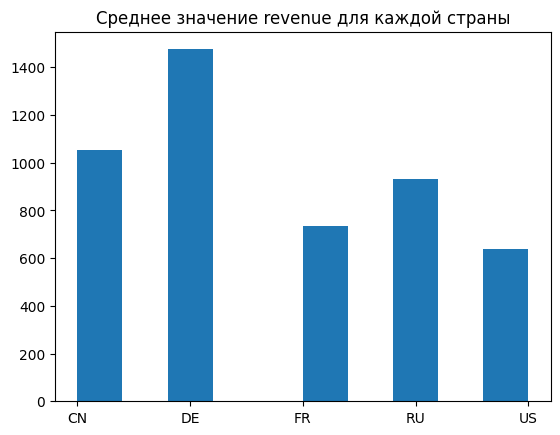

In [ ]:
fig, ax = plt.subplots()

labels = list(map(str,map(int,mean_data['revenue'])))
counts =mean_data['revenue']
bar_labels = mean_data['revenue'].keys()
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:pink']

ax.hist(bar_labels,weights=counts,align='mid')


ax.set_title('Среднее значение revenue для каждой страны')

plt.savefig('figures/hist.png')
plt.show()


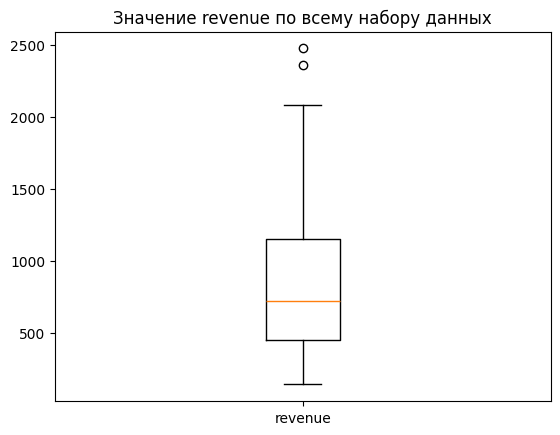

In [ ]:
plt.boxplot(data.loc[:,['revenue']],tick_labels=['revenue'])
plt.title("Значение revenue по всему набору данных")
plt.savefig('figures/boxplot.png')
plt.show()


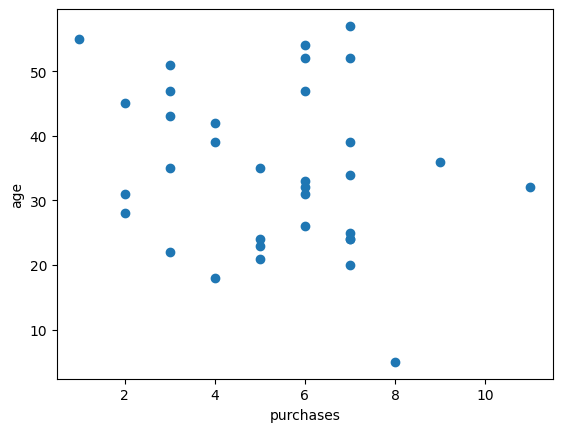

In [ ]:
plt.scatter(data['purchases'],data['age'])
plt.xlabel('purchases')
plt.ylabel('age')
plt.savefig('figures/scatter.png')
plt.show()